# Research on car sales ads
You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day.

You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

## 1. Open the data file and study the general information. 

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns
from scipy import stats
import numpy as np
import math
import plotly.express as px
from sklearn.preprocessing import FunctionTransformer
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import Image
Image(url="https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module6-RandomError/Normal%20Distribution%20deviations.png", width = 400, height = 200)
from scipy import stats
import sys
import warnings
if not sys.warnoptions:
      warnings.simplefilter("ignore")
try:
    vehicles_df = pd.read_csv('vehicles_us.csv')
except:
    vehicles_df = pd.read_csv('/datasets/vehicles_us.csv') 

In [4]:
vehicles_df.head()

price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     NaN  2019-02-07           79  
3    automatic  pickup         NaN     NaN  2019-03-22            9  
4    automatic   sedan       black     NaN  2019-04-02           28

In [5]:
vehicles_df.sample(5)

price  model_year                       model  condition  cylinders  \
44900  16995      2010.0     jeep wrangler unlimited  excellent        NaN   
38356  29900      2012.0                    ram 2500  excellent        8.0   
1616    6999      2012.0           chevrolet equinox  excellent        4.0   
28749  26500      2011.0  chevrolet silverado 2500hd  excellent        8.0   
32504  29995      2016.0             gmc sierra 1500  excellent        NaN   

         fuel  odometer transmission    type paint_color  is_4wd date_posted  \
44900     gas  113000.0       manual     SUV       green     1.0  2018-07-10   
38356  diesel   86359.0    automatic   truck         NaN     1.0  2018-11-27   
1616      gas  132424.0    automatic   wagon      silver     NaN  2019-01-06   
28749  diesel  199000.0    automatic   truck       white     1.0  2019-04-12   
32504     gas   89218.0    automatic  pickup        grey     1.0  2019-02-27   

       days_listed  
44900            5  
38356           20  
1616            41  
28749           10  
32504            5

In [6]:
vehicles_df.describe(include=["float"]).T

count           mean           std     min      25%       50%  \
model_year  47906.0    2009.750470      6.282065  1908.0   2006.0    2011.0   
cylinders   46265.0       6.125235      1.660360     3.0      4.0       6.0   
odometer    43633.0  115553.461738  65094.611341     0.0  70000.0  113000.0   
is_4wd      25572.0       1.000000      0.000000     1.0      1.0       1.0   

                 75%       max  
model_year    2014.0    2019.0  
cylinders        8.0      12.0  
odometer    155000.0  990000.0  
is_4wd           1.0       1.0

In [7]:
vehicles_df.columns

Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed'],
      dtype='object')

In [8]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


## Column Definitions
 - *price* : price of vehicle on market
 - *model_year* : model year of vehicle for sale
 - *model* : model of vehicle for sale
 - *condition* : condition of vehicle for sale
 - *cylinders* : number of cylinders of vehicle for sale
 - *fuel* : gas, diesel, etc.
 - *odometer* : the vehicle's mileage when the ad was published
 - *transmission* : transmission type of vehicle for sale
 - *type* : type of vehicle for sale
 - *paint_color* : paint color of vehicle for sale
 - *is_4wd* : whether the vehicle has 4-wheel drive (Boolean type)
 - *date_posted* : the date the ad was published
 - *days_listed* : from publication to removal

In [9]:
vehicles_df.describe()

price    model_year     cylinders       odometer   is_4wd  \
count   51525.000000  47906.000000  46265.000000   43633.000000  25572.0   
mean    12132.464920   2009.750470      6.125235  115553.461738      1.0   
std     10040.803015      6.282065      1.660360   65094.611341      0.0   
min         1.000000   1908.000000      3.000000       0.000000      1.0   
25%      5000.000000   2006.000000      4.000000   70000.000000      1.0   
50%      9000.000000   2011.000000      6.000000  113000.000000      1.0   
75%     16839.000000   2014.000000      8.000000  155000.000000      1.0   
max    375000.000000   2019.000000     12.000000  990000.000000      1.0   

       days_listed  
count  51525.00000  
mean      39.55476  
std       28.20427  
min        0.00000  
25%       19.00000  
50%       33.00000  
75%       53.00000  
max      271.00000

In [10]:
vehicles_nulls=pd.concat([vehicles_df.dtypes, vehicles_df.isna().sum(), vehicles_df.isna().sum()/len(vehicles_df)], axis=1)
vehicles_nulls.columns = ["type","count","missing_ratio"]
vehicles_nulls=vehicles_nulls[vehicles_nulls["count"]>0]
vehicles_nulls.sort_values(by="missing_ratio", ascending=False)

type  count  missing_ratio
is_4wd       float64  25953       0.503697
paint_color   object   9267       0.179854
odometer     float64   7892       0.153168
cylinders    float64   5260       0.102086
model_year   float64   3619       0.070238

In [11]:
vehicles_df.isnull().sum().sum()

51991

In [12]:
vehicles_nulls.shape

(5, 3)

There is clearly missing data especially in the *is_4wd* column that will need to be addressed during data preprocessing.

In the next section, I am looking for outliers in price of vehicle so that later on I can accurately determine what factors are affecting the price of the vehicles.

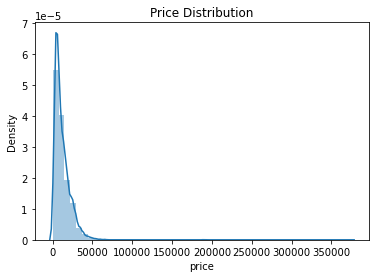

In [14]:
sns.distplot(vehicles_df['price']).set_title("Price Distribution")
plt.show();

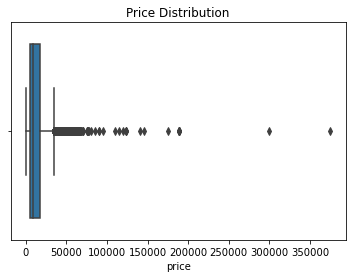

In [15]:
sns.boxplot(vehicles_df['price']).set_title("Price Distribution")
plt.show();

There are clear outliers in this data. The outliers could cause inaccurate reporting of what affects the price of a vehicle on this website. 

In [13]:
vehicles_df['price'].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

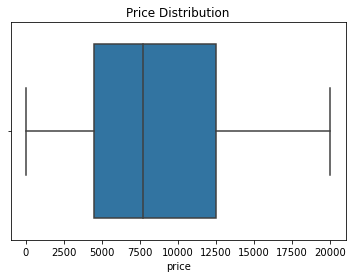

In [16]:
sns.boxplot(vehicles_df[vehicles_df['price']<20000]['price']).set_title("Price Distribution")
plt.show();

In [15]:
f"Skewness: {vehicles_df['price'].skew()}"
f"Kurtosis: {vehicles_df['price'].kurt()}"

'Skewness: 3.5895680364445934'

'Kurtosis: 63.34272232849575'

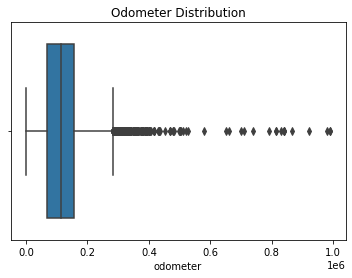

In [17]:
sns.boxplot(vehicles_df['odometer']).set_title("Odometer Distribution")
plt.show();

Based on these skew calculations, the data is slightly skewed in the positive direction toward higher prices in vehicle in the *price* column.

In [17]:
def describe_full(df, target_name):
    data_describe = df.describe().T
    df_numeric=df._get_numeric_data()
    dtype_df=df_numeric.dtypes
    data_describe['dtypes']=dtype_df
    data_null = df_numeric.isnull().sum()/len(df) * 100
    data_describe['Missing %']=data_null
    Cardinality=df_numeric.apply(pd.Series.nunique)
    data_describe['Cardinality']=Cardinality
    df_skew=df_numeric.skew(axis = 0, skipna = True) 
    data_describe['Skew']=df_skew
    return data_describe
describe_full(vehicles_df, "price")

count           mean           std     min      25%       50%  \
price        51525.0   12132.464920  10040.803015     1.0   5000.0    9000.0   
model_year   47906.0    2009.750470      6.282065  1908.0   2006.0    2011.0   
cylinders    46265.0       6.125235      1.660360     3.0      4.0       6.0   
odometer     43633.0  115553.461738  65094.611341     0.0  70000.0  113000.0   
is_4wd       25572.0       1.000000      0.000000     1.0      1.0       1.0   
days_listed  51525.0      39.554760     28.204270     0.0     19.0      33.0   

                  75%       max   dtypes  Missing %  Cardinality      Skew  
price         16839.0  375000.0    int64   0.000000         3443  3.589568  
model_year     2014.0    2019.0  float64   7.023775           68 -1.891707  
cylinders         8.0      12.0  float64  10.208637            7  0.010434  
odometer     155000.0  990000.0  float64  15.316836        17762  0.992859  
is_4wd            1.0       1.0  float64  50.369723            1  0.000000  
days_listed      53.0     271.0    int64   0.000000          227  1.441448

Text(0.5, 1.0, 'Days_listed')

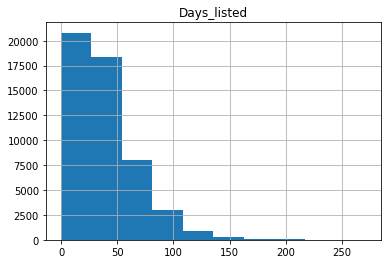

In [18]:
vehicles_df["days_listed"].hist().set_title("Days_listed")

Besides *price*, the next column that is skewed positively is the *days_listed* column shown by the histogram above.

Next I will see if there are any correlations between the *price* column and other quantitative columns.

In [19]:
cols = ["price",
"model_year",
"cylinders",
"odometer",
"is_4wd",
"days_listed"]
for col in cols:
   vehicles_df[[col, "price"]].corr()

price  price
price    1.0    1.0
price    1.0    1.0

model_year     price
model_year    1.000000  0.428656
price         0.428656  1.000000

cylinders     price
cylinders   1.000000  0.296627
price       0.296627  1.000000

odometer     price
odometer  1.000000 -0.420299
price    -0.420299  1.000000

is_4wd  price
is_4wd     NaN    NaN
price      NaN    1.0

days_listed     price
days_listed     1.000000 -0.000682
price          -0.000682  1.000000

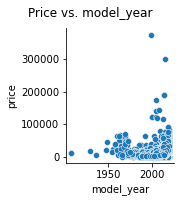

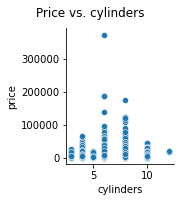

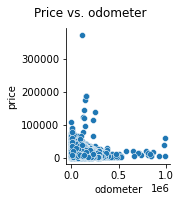

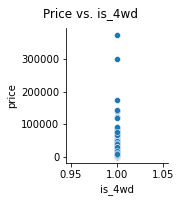

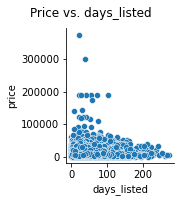

In [18]:
a = sns.pairplot(data=vehicles_df,
                  y_vars=['price'],
                  x_vars=["model_year"])
a.fig.suptitle("Price vs. model_year", y=1.08)
plt.show();

b = sns.pairplot(data=vehicles_df,
                  y_vars=['price'],
                  x_vars=["cylinders"])
b.fig.suptitle("Price vs. cylinders", y=1.08)
plt.show();

c = sns.pairplot(data=vehicles_df,
                  y_vars=['price'],
                  x_vars=["odometer"])
c.fig.suptitle("Price vs. odometer", y=1.08)
plt.show();

d = sns.pairplot(data=vehicles_df,
                  y_vars=['price'],
                  x_vars=["is_4wd"])
d.fig.suptitle("Price vs. is_4wd", y=1.08)
plt.show();

e = sns.pairplot(data=vehicles_df,
                  y_vars=['price'],
                  x_vars=["days_listed"])
e.fig.suptitle("Price vs. days_listed", y=1.08)
plt.show();

### 1.1 Conclusion
There is a good chunk of missing data especially in the *4wd* column. There also appears to be some correlation between columns, however the missing data needs to be dealt with first. It appears that *price* may have a positive correlation with both the *model_year* and *cylinders* columns. It also appears that *price* has a slight negative correlation with the *odometer* and *days_listed* columns. However it is clear that the *price* column is skewed causing the data to be unbalanced. This will need to be addressed.


- *price* 
    - price of vehicle on market
    - int64
- *model_year* 
    - model year of vehicle for sale
    - float64
    - 3619 missing values (7%)
- *model* 
    - model of vehicle for sale
    - object
- *condition* 
    - condition of vehicle for sale
    - object
- *cylinders* 
    - number of cylinders of vehicle for sale
    - float64
    - 5260 missing values (10%)
- *fuel* 
    - gas, diesel, etc.
    - object
- *odometer* 
    - the vehicle's mileage when the ad was published
    - float64
    - 7892 missing values (15%)
- *transmission* 
    - transmission type of vehicle for sale
    - object
- *type* 
    - type of vehicle for sale
    - object
- *paint_color* 
    - paint color of vehicle for sale
    - object
    - 9267 missing values (18%)
- *is_4wd* 
    - whether the vehicle has 4-wheel drive (Boolean type)
    - float64
    - 25953 missing values (50%)
- *date_posted* 
    - the date the ad was published
    - object
- *days_listed* 
    - from publication to removal
    - int64

## 2. Data Preprocessing
- Identify and study missing values:
  In some cases there's an obvious way to replace missing values. For instance, if a Boolean field contains only True values, it's reasonable to assume that the missing values are False. There aren't such obvious fixes for other data types, and there are cases when the fact that a value is missing is significant. In such instances, don't fill in the values. When appropriate, do fill in the values. Explain why you chose to do so and how you selected the replacement values. Describe the factors that may have resulted in missing values.
- Convert the data to the required types:
  Indicate the columns where the data types need to be changed and explain why.

### Processing Missing Values

This is a table of missing values from our vehicles_df.

In [20]:
vehicles_nulls.sort_values(by="missing_ratio", ascending=False)

type  count  missing_ratio
is_4wd       float64  25953       0.503697
paint_color   object   9267       0.179854
odometer     float64   7892       0.153168
cylinders    float64   5260       0.102086
model_year   float64   3619       0.070238

This is a statistical table of our numerical columns.

In [21]:
vehicles_df.describe()

price    model_year     cylinders       odometer   is_4wd  \
count   51525.000000  47906.000000  46265.000000   43633.000000  25572.0   
mean    12132.464920   2009.750470      6.125235  115553.461738      1.0   
std     10040.803015      6.282065      1.660360   65094.611341      0.0   
min         1.000000   1908.000000      3.000000       0.000000      1.0   
25%      5000.000000   2006.000000      4.000000   70000.000000      1.0   
50%      9000.000000   2011.000000      6.000000  113000.000000      1.0   
75%     16839.000000   2014.000000      8.000000  155000.000000      1.0   
max    375000.000000   2019.000000     12.000000  990000.000000      1.0   

       days_listed  
count  51525.00000  
mean      39.55476  
std       28.20427  
min        0.00000  
25%       19.00000  
50%       33.00000  
75%       53.00000  
max      271.00000

After checking to see how many missing values we have, we can see that there are a couple columns with missing data that needs to be addressed during data preprocessing. The most extreme example of this is column *is_4wd* with over 50% of the data missing in this column. This could correspond with missing values representing a vehicle without 4wd. To address this, we will replace the missing values with 0.

In [22]:
vehicles_df['is_4wd'].fillna(0, inplace = True)
vehicles_df.head()

price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     0.0  2019-02-07           79  
3    automatic  pickup         NaN     0.0  2019-03-22            9  
4    automatic   sedan       black     0.0  2019-04-02           28

Checking to see if there are missing values in the *is_4wd* column

In [23]:
vehicles_nulls=pd.concat([vehicles_df.dtypes, vehicles_df.isna().sum(), vehicles_df.isna().sum()/len(vehicles_df)], axis=1)
vehicles_nulls.columns = ["type","count","missing_ratio"]
vehicles_nulls=vehicles_nulls[vehicles_nulls["count"]>0]
vehicles_nulls.sort_values(by="missing_ratio", ascending=False)

type  count  missing_ratio
paint_color   object   9267       0.179854
odometer     float64   7892       0.153168
cylinders    float64   5260       0.102086
model_year   float64   3619       0.070238

Looking at the highest vehicle *price* 

In [24]:
vehicles_df.loc[vehicles_df['price'] == 375000]

price  model_year            model condition  cylinders fuel  \
12504  375000      1999.0  nissan frontier      good        6.0  gas   

       odometer transmission    type paint_color  is_4wd date_posted  \
12504  115000.0    automatic  pickup        blue     1.0  2018-05-19   

       days_listed  
12504           21

Looking at the highest *odometer* reading

In [25]:
vehicles_df.loc[vehicles_df['odometer'] == 990000]

price  model_year               model condition  cylinders fuel  \
17869  59900      1964.0  chevrolet corvette  like new        NaN  gas   
40729   4700      2013.0     chevrolet cruze      good        6.0  gas   

       odometer transmission         type paint_color  is_4wd date_posted  \
17869  990000.0    automatic  convertible         red     0.0  2018-06-17   
40729  990000.0    automatic        sedan       black     0.0  2018-05-02   

       days_listed  
17869           28  
40729            4

Using the isna().sum() method we can see the statistics of missing numerical data in our table. Briefly looking at the rest of the csv file, there is missing data from both categorical and quantitative columns. The type of missing data represented here is Missing at random (MAR) where the value is missing because there was no value recorded in that column. MAR occurs when the analysis collecting the data failed to recorded the data in that column, or signal/corruption occurred while transferring the data to the database. As an example, it is likely that the *is_4wd* column missing data represented 4wd not being present on a vehicle. The *is_4wd* represents a Boolean categorical variable in which it is either True (1) or False (0). 

Using the describe() method, we can observe the major outliers in the data. Looking at the row with the highest price for a vehicle at $375,000, there seems to be some issues with this row. It doesn't make sence that a 1999 nissan frontier with 115,000 miles on the *odometer* reading would cose that much. It is clear that outliers in this data need to be dealt with along with missing values. 

The *cylinders* and *model_year* columns represent display less than 10 percent missing data, therefore, these columns can be dropped. We can also fill NaN in the *paint_color* with a new categorical variable since there is no way to fill in the medican of a paint color. The *odometer* column contains significant outliers, so the missing values will be replaces with the median of the column.

First, we are going to drop that 'NaN's in the *model_year* and *cylinders* columns.

In [26]:
auto_df = vehicles_df.dropna(subset=['model_year', 'cylinders']).reset_index(drop=True)
auto_df.head()

price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
2   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
3  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   
4  14990      2014.0    chrysler 300  excellent        6.0  gas   57954.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automatic   sedan         red     0.0  2019-02-07           79  
2    automatic  pickup         NaN     0.0  2019-03-22            9  
3    automatic   sedan       black     0.0  2019-04-02           28  
4    automatic   sedan       black     1.0  2018-06-20           15

Now, we am going to fill in the missing values in the *paint_color* column with 'unknown'

In [27]:
auto_df['paint_color'] = auto_df['paint_color'].fillna(value='unknown')

Next, we are going to fill the *odometer* missing values with the medican of the column.

In [28]:
median_od = auto_df['odometer'].median()

auto_df['odometer'] = auto_df['odometer'].fillna(median_od)
auto_df['odometer'].head()

0    145000.0
1    110000.0
2    113000.0
3     80903.0
4     57954.0
Name: odometer, dtype: float64

In [29]:
auto_nulls=pd.concat([auto_df.dtypes, auto_df.isna().sum(), auto_df.isna().sum()/len(auto_df)], axis=1)
auto_nulls.columns = ["type","count","missing_ratio"]
auto_nulls=auto_nulls[auto_nulls["count"]>0]
auto_nulls.sort_values(by="missing_ratio", ascending=False)

Empty DataFrame
Columns: [type, count, missing_ratio]
Index: []

Now we have a dataframe with no missing values known as auto_df.

### Data type Replacement

In [30]:
auto_df.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

Some of the columns need to be changed from float64 to int64 data types. These columns are *model_year*, *cylinders*, *odometer*, and *is_4wd*. We need to change these columns because we do not need a decimal point for model year, number of cylinders, vehicle mileage, or whether a vehicle is 4wd or not.

In [31]:
auto_df['model_year'] = auto_df['model_year'].astype('int64')
auto_df['cylinders'] = auto_df['cylinders'].astype('int64')
auto_df['odometer'] = auto_df['odometer'].astype('int64')
auto_df['is_4wd'] = auto_df['is_4wd'].astype('int64')

In [32]:
auto_df.dtypes

price            int64
model_year       int64
model           object
condition       object
cylinders        int64
fuel            object
odometer         int64
transmission    object
type            object
paint_color     object
is_4wd           int64
date_posted     object
days_listed      int64
dtype: object

Using the astype() method we have changed the columns in our data frame to the correct data type.

## 3. Make calculations and add them to the table
- Day of the week, month, and year the ad was placed
- The vehicle's age (in years) when the ad was placed
- The vehicle's average mileage per year
- In the condition column, replace string values with a numeric scale:
  new = 5
  like new = 4
  excellent = 3
  good = 2
  fair = 1
  salvage = 0

First, we need to replace string values in the *condition* column with a numeric scale.

In [33]:
auto_df['condition'] = auto_df['condition'].replace(['new', 'like new', 'excellent', 'good', 'fair', 'salvage'], [5, 4, 3, 2, 1, 0])

Next, we are going change the *date_posted* to datetime format

In [34]:
auto_df['date_posted'] = pd.to_datetime(auto_df['date_posted'], format='%Y-%m-%d %H:%M:%S', errors='raise')

auto_df['day_of_week'] = auto_df['date_posted'].dt.dayofweek 
auto_df['week'] = auto_df['date_posted'].dt.week
auto_df['month'] = auto_df['date_posted'].dt.month 
auto_df['year'] = auto_df['date_posted'].dt.year

In [35]:
auto_df.sample(10)

price  model_year                model  condition  cylinders fuel  \
38000   5400        2012             kia soul          3          4  gas   
20430   7500        2009       subaru impreza          3          4  gas   
10014  19995        2010        toyota tundra          2          8  gas   
28868   7795        2010  chevrolet silverado          2          6  gas   
16032   4500        2009         jeep liberty          3          6  gas   
10155      1        2017  jeep grand cherokee          3         10  gas   
3919   10900        2011  jeep grand cherokee          3          6  gas   
2879   15985        2009      chevrolet tahoe          3          8  gas   
35282  11995        2011           honda cr-v          2          4  gas   
14186   6995        2012           ford focus          3          4  gas   

       odometer transmission   type paint_color  is_4wd date_posted  \
38000    113000    automatic  wagon       black       0  2018-09-08   
20430    108331    automatic  wagon        blue       1  2018-09-09   
10014    113000    automatic  truck        blue       1  2019-03-24   
28868    113000    automatic  truck       black       0  2018-08-09   
16032    160000    automatic    SUV       white       0  2018-08-15   
10155     53718        other    SUV     unknown       1  2018-12-20   
3919     109000    automatic    SUV     unknown       1  2018-08-17   
2879      95173    automatic    SUV        blue       1  2018-12-29   
35282    109200    automatic    SUV        grey       0  2019-03-03   
14186    104272    automatic  sedan     unknown       0  2018-05-10   

       days_listed  day_of_week  week  month  year  
38000           91            5    36      9  2018  
20430           33            6    36      9  2018  
10014           14            6    12      3  2019  
28868           25            3    32      8  2018  
16032           44            2    33      8  2018  
10155           39            3    51     12  2018  
3919            61            4    33      8  2018  
2879            83            5    52     12  2018  
35282           95            6     9      3  2019  
14186           52            3    19      5  2018

Next, we need to calculate the age of the vehicle of when the add for the vehicle was placed as well as the vehicle's average mileage per year.

In [36]:
auto_df['age_in_years'] = auto_df['year'] - auto_df['model_year']
auto_df['average_mileage_per_year'] = auto_df['odometer'] / auto_df['age_in_years']

In [37]:
auto_df.describe()

price    model_year     condition     cylinders       odometer  \
count   43009.000000  43009.000000  43009.000000  43009.000000   43009.000000   
mean    12168.670604   2009.761073      2.637053      6.126276  114967.597038   
std     10019.342590      6.266108      0.713040      1.659540   59882.186015   
min         1.000000   1908.000000      0.000000      3.000000       0.000000   
25%      5000.000000   2006.000000      2.000000      4.000000   78840.000000   
50%      9000.000000   2011.000000      3.000000      6.000000  113000.000000   
75%     16900.000000   2014.000000      3.000000      8.000000  146345.000000   
max    375000.000000   2019.000000      5.000000     12.000000  990000.000000   

             is_4wd   days_listed   day_of_week          week         month  \
count  43009.000000  43009.000000  43009.000000  43009.000000  43009.000000   
mean       0.496873     39.573671      2.997047     26.936827      6.640471   
std        0.499996     28.180113      1.998934     15.138336      3.474455   
min        0.000000      0.000000      0.000000      1.000000      1.000000   
25%        0.000000     19.000000      1.000000     13.000000      3.000000   
50%        0.000000     33.000000      3.000000     28.000000      7.000000   
75%        1.000000     53.000000      5.000000     40.000000     10.000000   
max        1.000000    271.000000      6.000000     52.000000     12.000000   

               year  age_in_years  average_mileage_per_year  
count  43009.000000  43009.000000              4.300800e+04  
mean    2018.306471      8.545397                       inf  
std        0.461033      6.277680                       NaN  
min     2018.000000      0.000000              0.000000e+00  
25%     2018.000000      4.000000              1.053533e+04  
50%     2018.000000      7.000000              1.544233e+04  
75%     2019.000000     12.000000              2.301767e+04  
max     2019.000000    110.000000                       inf

In [38]:
auto_df[np.isinf(auto_df['average_mileage_per_year'])]

price  model_year                        model  condition  cylinders  \
17     13990        2018              hyundai elantra          3          4   
62     23300        2018  nissan frontier crew cab sv          2          6   
67     23800        2019  nissan frontier crew cab sv          2          6   
86     39950        2018          chevrolet silverado          3          8   
92     21500        2019  nissan frontier crew cab sv          2          6   
...      ...         ...                          ...        ...        ...   
42859  28990        2018                   ford f-150          3          8   
42884  27890        2018                     ram 1500          3          8   
42938  15999        2018             chevrolet malibu          3          4   
42939  33990        2019                     ram 1500          3          8   
42989  20481        2018                 toyota camry          4          4   

      fuel  odometer transmission    type paint_color  is_4wd date_posted  \
17     gas     31932    automatic   sedan         red       0  2018-08-25   
62     gas     27493        other  pickup     unknown       1  2018-10-13   
67     gas     10899        other  pickup      silver       1  2019-02-28   
86     gas     18500    automatic   truck     unknown       1  2018-08-05   
92     gas     16168        other  pickup       white       0  2019-03-29   
...    ...       ...          ...     ...         ...     ...         ...   
42859  gas     10622    automatic   truck        grey       1  2018-11-23   
42884  gas      9446    automatic   truck     unknown       1  2018-05-06   
42938  gas     50502    automatic   sedan       black       0  2018-07-28   
42939  gas      9000    automatic   truck       white       1  2019-01-25   
42989  gas     38590    automatic   sedan      silver       0  2018-12-06   

       days_listed  day_of_week  week  month  year  age_in_years  \
17              27            5    34      8  2018             0   
62              36            5    41     10  2018             0   
67              30            3     9      2  2019             0   
86              16            6    31      8  2018             0   
92              70            4    13      3  2019             0   
...            ...          ...   ...    ...   ...           ...   
42859           31            4    47     11  2018             0   
42884           39            6    18      5  2018             0   
42938            8            5    30      7  2018             0   
42939           36            4     4      1  2019             0   
42989            4            3    49     12  2018             0   

       average_mileage_per_year  
17                          inf  
62                          inf  
67                          inf  
86                          inf  
92                          inf  
...                         ...  
42859                       inf  
42884                       inf  
42938                       inf  
42939                       inf  
42989                       inf  

[1938 rows x 19 columns]

Looking at our new *average_mileage_per_year* column, we can see that the standard deviation is NaN and our mean is inf. This is because the lowest *age_in_years* is zero. Trying to make statistical calculations with zero gives us inf or NaN. We can either drop those rows or turn those inf values into 0.

In [39]:
auto_df['average_mileage_per_year'] = pd.to_numeric(auto_df['average_mileage_per_year'], errors='coerce')
auto_df['average_mileage_per_year'] = auto_df['average_mileage_per_year'].replace(np.inf, int(float(0)))
auto_df['average_mileage_per_year'] = auto_df['average_mileage_per_year'].fillna(0).astype(int)
auto_df['average_mileage_per_year'] = auto_df['average_mileage_per_year'].astype('int64')

In [40]:
auto_df.sample(5)

price  model_year                    model  condition  cylinders fuel  \
13177   1900        2001  chrysler town & country          4          6  gas   
5763    9995        2011         chevrolet camaro          2          6  gas   
21732   1200        2000      jeep grand cherokee          1          6  gas   
18603   8500        2002               gmc sierra          2          8  gas   
18289   4995        2009         chevrolet malibu          2          4  gas   

       odometer transmission         type paint_color  is_4wd date_posted  \
13177    113000    automatic          van        grey       0  2018-08-19   
5763     123618    automatic  convertible         red       0  2018-11-01   
21732    223678    automatic          SUV         red       1  2018-10-08   
18603    123067    automatic        truck       white       0  2018-07-16   
18289    113000    automatic        sedan     unknown       0  2018-11-26   

       days_listed  day_of_week  week  month  year  age_in_years  \
13177           34            6    33      8  2018            17   
5763            68            3    44     11  2018             7   
21732           76            0    41     10  2018            18   
18603           22            0    29      7  2018            16   
18289           63            0    48     11  2018             9   

       average_mileage_per_year  
13177                      6647  
5763                      17659  
21732                     12426  
18603                      7691  
18289                     12555

### Conclusion 
We were able to make calculations and add them to the table. The columns *day_of_week*, *week*, *month*, *year*, *age_in_years*, and *average_mileage_per_year* were added to our table. 

## 4. Carry out exploratory data analysis

- Study the following parameters: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition. Plot histograms for each of these parameters. Study how outliers affect the form and readability of the histograms.

- Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data.

- Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram.

- Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.

- Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads.

- What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.

In [41]:
auto_df[['price', 'model_year', 'odometer', 'days_listed', 'age_in_years', 'average_mileage_per_year', 'cylinders', 'condition']].corr()

price  model_year  odometer  days_listed  \
price                     1.000000    0.434491 -0.390359    -0.001103   
model_year                0.434491    1.000000 -0.436010    -0.006295   
odometer                 -0.390359   -0.436010  1.000000     0.004797   
days_listed              -0.001103   -0.006295  0.004797     1.000000   
age_in_years             -0.433254   -0.997300  0.434623     0.007133   
average_mileage_per_year  0.170770    0.390542  0.169123    -0.004014   
cylinders                 0.295579   -0.148040  0.082703     0.002502   
condition                 0.222394    0.282918 -0.277292    -0.005643   

                          age_in_years  average_mileage_per_year  cylinders  \
price                        -0.433254                  0.170770   0.295579   
model_year                   -0.997300                  0.390542  -0.148040   
odometer                      0.434623                  0.169123   0.082703   
days_listed                   0.007133                 -0.004014   0.002502   
age_in_years                  1.000000                 -0.395756   0.147848   
average_mileage_per_year     -0.395756                  1.000000  -0.046620   
cylinders                     0.147848                 -0.046620   1.000000   
condition                    -0.282090                  0.070983  -0.063130   

                          condition  
price                      0.222394  
model_year                 0.282918  
odometer                  -0.277292  
days_listed               -0.005643  
age_in_years              -0.282090  
average_mileage_per_year   0.070983  
cylinders                 -0.063130  
condition                  1.000000

Text(0.5, 1.02, 'Scatter matrix showing relationships between parameters')


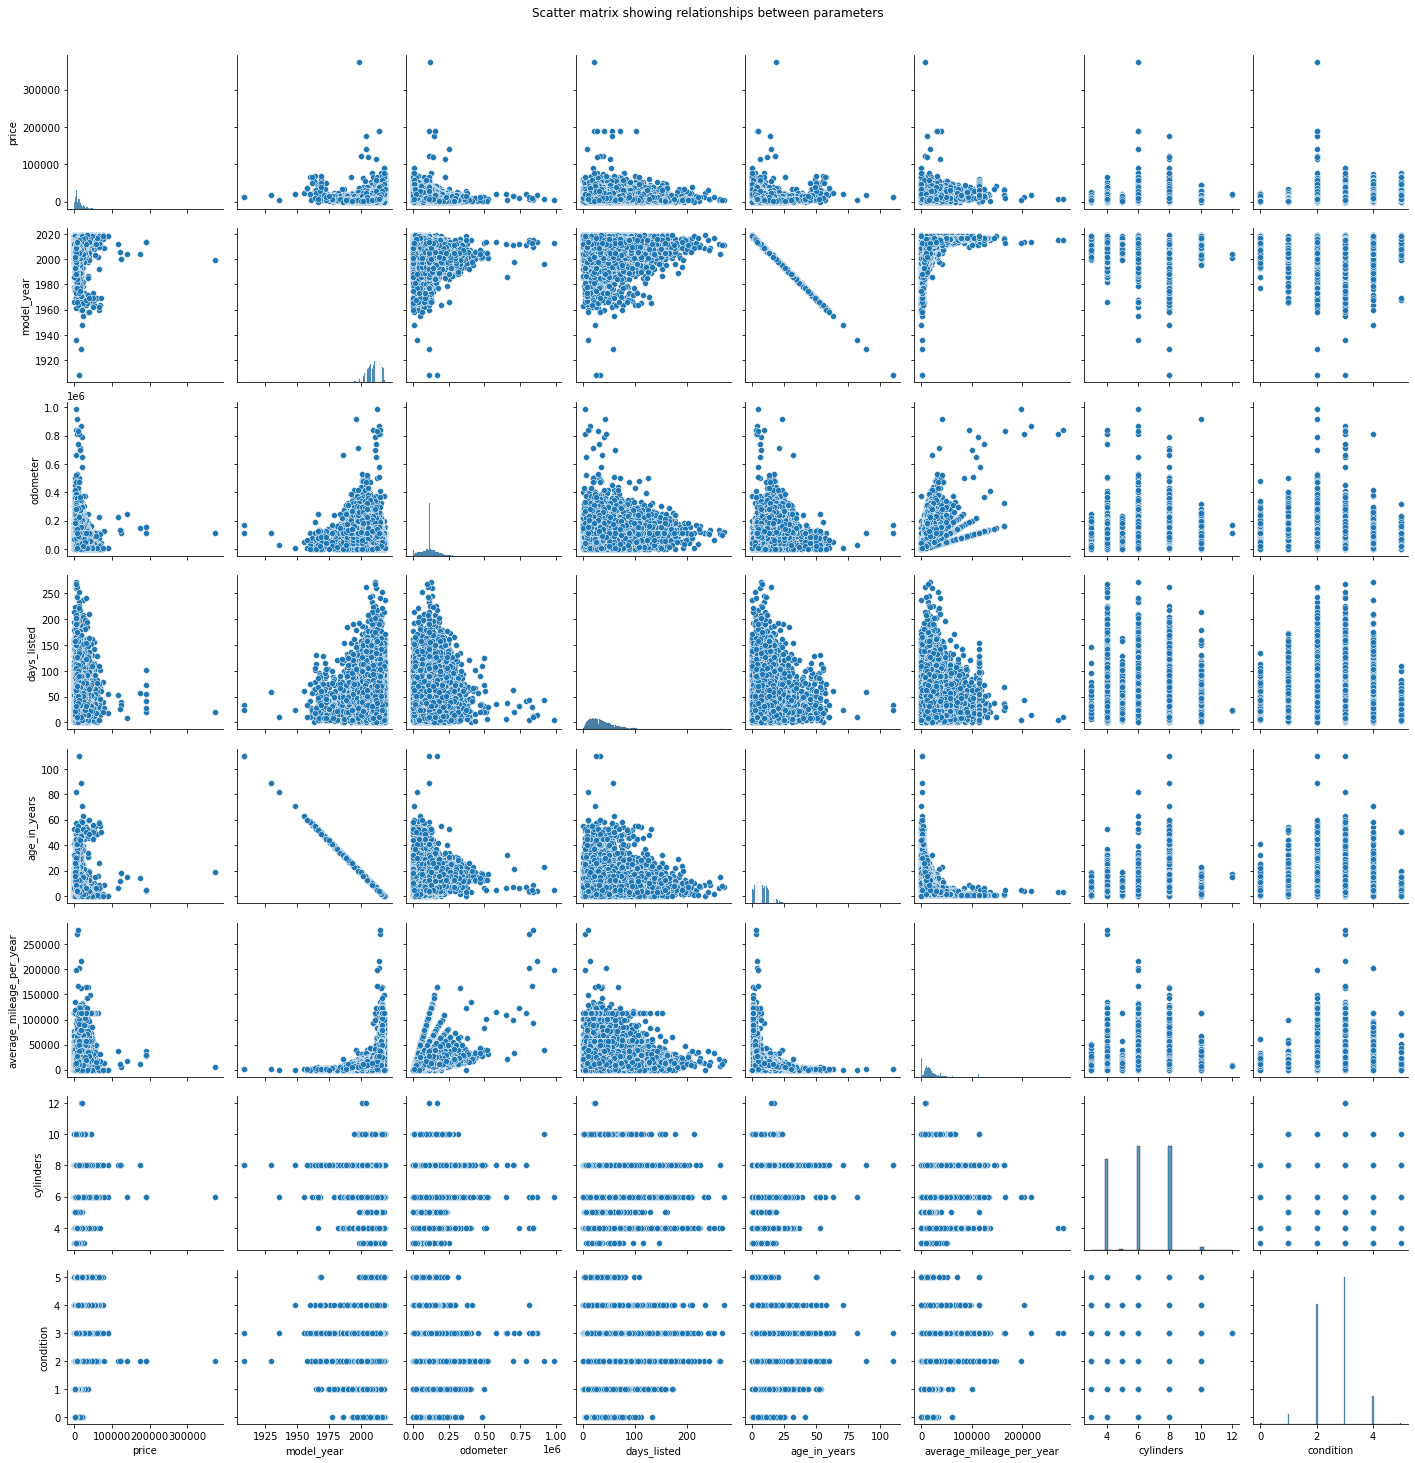

In [45]:
print(sns.pairplot(auto_df[['price', 'model_year', 'odometer', 'days_listed', 'age_in_years', 'average_mileage_per_year', 'cylinders', 'condition']]
).fig.suptitle('Scatter matrix showing relationships between parameters', y=1.02))

Each scatter matrix generated above shows the relationship between a pair of parameters within this list: *price*, *model_year*, *odometer*, *days_listed*, *age_in_years*, *average_mileage_per_year*, *cylinders*, and *condition*. Based on the *price* vs. *price* scatter matrix in the upper lefthand corner, we can see that most prices of cars lay between 0 and 50,000. The second scatter matrix plotting *price* vs. *model_year* shows that most car prices are below 100,000 and made between 1960 and 2018. In the third scatter matrix plotting *price* vs. *odometer*, the data is heavily skewed to the left of the graph and there are a few outliers to the right. In the fourth scatter matrix plotting *price* vs. *days_listed*, there are multiple data points for 0 days_listed. This would probably indicate that ads were listed and removed within the same day. 

It is clear that we need to investigate this data further. Based on the correlation calculations and the scatter matricies, our data contains some outliers. To combat this, we can plot histograms for the *price*, *model_year*, *odometer*, *days_listed*, *age_in_years*, *average_mileage_per_year*, *cylinders*, and *condition* parameters to study the outliers and how they affect each parameter.

Below are the histograms for *price*, *model_year*, *odometer*, *days_listed*, *age_in_years*, *average_mileage_per_year*, *cylinders*, and *condition* parameters

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'model_year'}>,
        <AxesSubplot:title={'center':'odometer'}>],
       [<AxesSubplot:title={'center':'days_listed'}>,
        <AxesSubplot:title={'center':'age_in_years'}>,
        <AxesSubplot:title={'center':'average_mileage_per_year'}>],
       [<AxesSubplot:title={'center':'cylinders'}>,
        <AxesSubplot:title={'center':'condition'}>, <AxesSubplot:>]],
      dtype=object)

Text(0.5, 0.95, 'Histograms of parameters of interest')

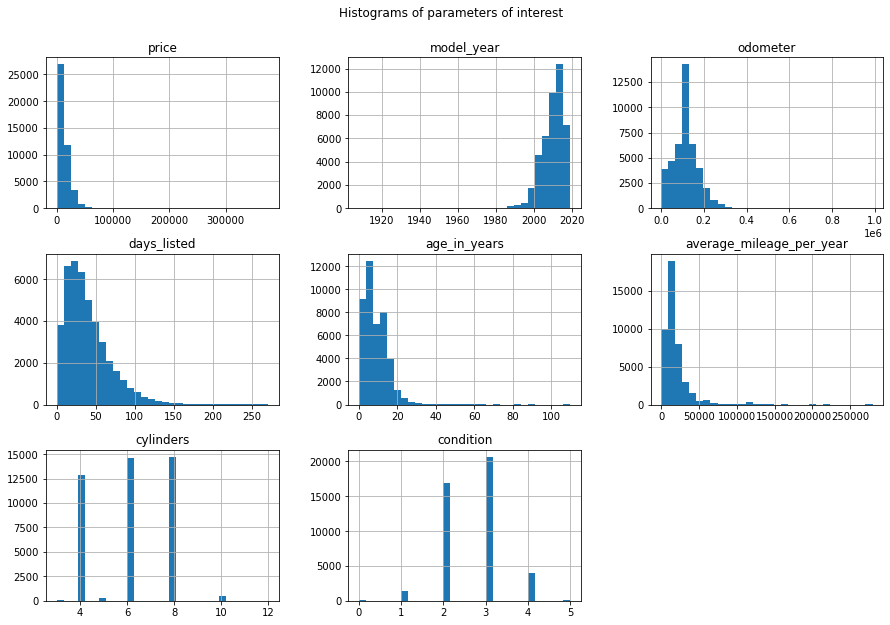

In [47]:
auto_df[['price', 'model_year', 'odometer', 'days_listed', 'age_in_years', 'average_mileage_per_year', 'cylinders', 'condition']].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of parameters of interest', y=0.95)

Now we are going to look closer at each parameter.
#### *price*

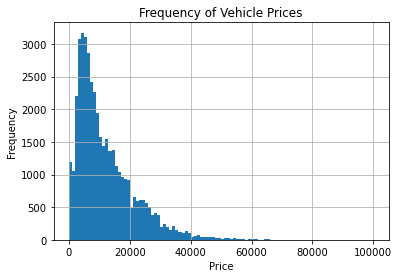

In [51]:
auto_df['price'].hist(bins=100, range=[0, 100000])
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title("Frequency of Vehicle Prices")
plt.show();

The "Frequency of Vehicle Prices" histogram above shows the frequency distribution of vehicle prices in the data. It appears that the data is skewed in the positive direction to the right. Most of the data points fall between 1 and 20,000. The peak of the histogram is around the 5000 mark. The minimum for the histogram is 1 and the max for the histogram is 375,000. The median of the histogram is 9000. Clearly 375,000 is a significant outlier in price that should be corrected.

#### age_in_years

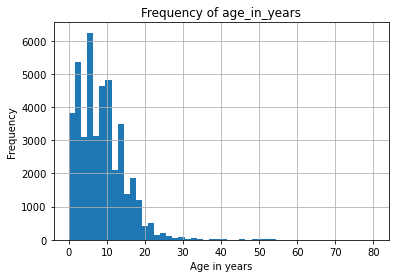

In [52]:
auto_df['age_in_years'].hist(bins=50, range=[0, 80])
plt.xlabel('Age in years')
plt.ylabel('Frequency')
plt.title("Frequency of age_in_years")
plt.show();

In [53]:
auto_df['age_in_years'].median()

7.0

The "Frequency of age_in_years" histogram above shows the frequency distribution of vehicle ages in years shown in the data. It appears that the data is skewed in the positive direction to the right. Most of the vehicle ages are found between 0 and 20 years, with a few outlier data points along the left tail of the data. The peak of the histogram is around the 5 year mark. The minimum for the histogram is 0 and the max for the histogram is 110. The median of the histogram is 7 years. Clearly 110 years is a significant outlier for vehicle age that should be corrected.

In [54]:
auto_df['odometer'].min()
auto_df['odometer'].max()
auto_df['odometer'].median()

0

990000

113000.0

#### *odometer*

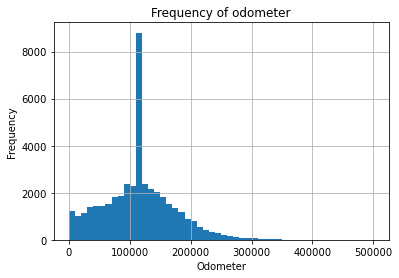

In [55]:
auto_df['odometer'].hist(bins=50, range=[0, 500000])
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.title("Frequency of odometer")
plt.show();

The "Frequency of odometer" histogram above shows the frequency distribution of vehicle's mileage. Based on the histogram, the distribution appears to be skewed right once again. Most of the odometer readings lie between 0 and 200,000 miles. The peak of the histogram is around 120,000 miles. The minimum for the histogram is 0 and the max for the histogram is 990,000. The median of the histogram is 113,000. Clearly 990,000 is a significant outlier in vehicle mileage.

#### Conclusion: 
The above three histograms show that the distribution is right-skewed, and there are extreme higher values at the right of the histogram. We can conclude that there are outliers just by looking at the distribution of the data.

#### *cylinders*

In [56]:
auto_df['cylinders'].median()

6.0

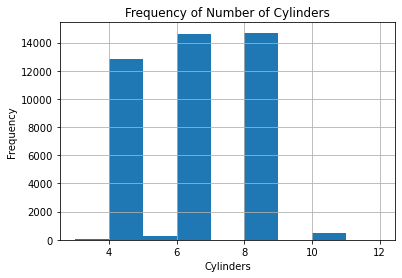

In [57]:
auto_df['cylinders'].hist(bins=9)
plt.xlabel('Cylinders')
plt.ylabel('Frequency')
plt.title("Frequency of Number of Cylinders")
plt.show();

The "Frequency of Number of Cylinders" histogram above shows the frequency distribution of the number of cylinders a vehicle has. Based on the histogram, most vehicles have either 6 or 8 cylinders. The minimum for the histogram is 3 and the max for the histogram is 12 cylinders. The median of the histogram is 6 cylinders. Since the standard deviation is approximately 1.7, we can conclude that there is some amount of outliers in this column.

#### *condition*

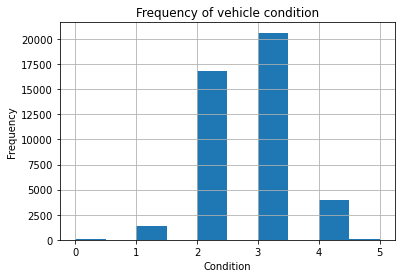

In [58]:
auto_df['condition'].hist(bins=10)
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.title("Frequency of vehicle condition")
plt.show();

The "Frequency of vehicle condition" histogram above shows the frequency distribution of vehicle conditions in this data set. Most of the vehicles in the dataset are in good or excellent condition. Very few salvage and new vehicles are listed. The minimum for the histogram is 0 and the max for the histogram is 5. The median of the histogram is 3 or excellent condition. We can conclude that the frequency distribution does have outliers.

In [59]:
auto_df[['price', 'age_in_years', 'odometer', 'cylinders', 'condition']].describe()

price  age_in_years       odometer     cylinders     condition
count   43009.000000  43009.000000   43009.000000  43009.000000  43009.000000
mean    12168.670604      8.545397  114967.597038      6.126276      2.637053
std     10019.342590      6.277680   59882.186015      1.659540      0.713040
min         1.000000      0.000000       0.000000      3.000000      0.000000
25%      5000.000000      4.000000   78840.000000      4.000000      2.000000
50%      9000.000000      7.000000  113000.000000      6.000000      3.000000
75%     16900.000000     12.000000  146345.000000      8.000000      3.000000
max    375000.000000    110.000000  990000.000000     12.000000      5.000000

#### Outlier detection
One approach to detecting outliers is to use the Z-score which is calculated by subtracting each value from the mean of the data and dividing it by the standard deviation.$$
    z = \frac {x - \mu}{\sigma}
$$

We will determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue our work with the filtered data.

In [60]:
iqr = auto_df[['price', 'age_in_years', 'odometer']].quantile(0.75) - auto_df[['price', 'age_in_years', 'odometer']].quantile(0.25)
auto_df_outliers_upper = auto_df[['price', 'age_in_years', 'odometer']].quantile(0.75) + iqr*1.5
auto_df_outliers_lower = auto_df[['price', 'age_in_years', 'odometer']].quantile(0.25) - iqr*1.5
print('The inter-quartile range are - price: {}, age in years: {}, and odometer: {}'.format(*iqr))
print()
print('The upper bound are - price: {}, age in years: {}, and odometer: {}'.format(*auto_df_outliers_upper))
print()
print('The lower bound are - price: {}, age in years: {}, and odometer: {}'.format(*auto_df_outliers_lower))

The inter-quartile range are - price: 11900.0, age in years: 8.0, and odometer: 67505.0

The upper bound are - price: 34750.0, age in years: 24.0, and odometer: 247602.5

The lower bound are - price: -12850.0, age in years: -8.0, and odometer: -22417.5


We use the stats package in scipy to determine the Z-score and filter the data to obtain the distribution where the mean is 0 and the standard deviation is 1.

In [61]:
stats.zscore(auto_df['price'])

array([-0.27633577, -0.66558739, -1.06481983, ..., -0.82028996,
       -0.47046254, -0.58574091])

In [62]:
auto_filtered = auto_df[(np.abs(stats.zscore(auto_df[['price', 'age_in_years', 'odometer']])) < 3).all(axis=1)]
auto_filtered = auto_filtered.reset_index(drop=True, inplace=False)
auto_filtered

price  model_year           model  condition  cylinders fuel  odometer  \
0       9400        2011          bmw x5          2          6  gas    145000   
1       5500        2013  hyundai sonata          4          4  gas    110000   
2       1500        2003      ford f-150          1          8  gas    113000   
3      14900        2017    chrysler 200          3          4  gas     80903   
4      14990        2014    chrysler 300          3          6  gas     57954   
...      ...         ...             ...        ...        ...  ...       ...   
41749   9249        2013   nissan maxima          4          6  gas     88136   
41750   2700        2002     honda civic          0          4  gas    181500   
41751   3950        2009  hyundai sonata          3          4  gas    128000   
41752   7455        2013  toyota corolla          2          4  gas    139573   
41753   6300        2014   nissan altima          2          4  gas    113000   

      transmission    type paint_color  is_4wd date_posted  days_listed  \
0        automatic     SUV     unknown       1  2018-06-23           19   
1        automatic   sedan         red       0  2019-02-07           79   
2        automatic  pickup     unknown       0  2019-03-22            9   
3        automatic   sedan       black       0  2019-04-02           28   
4        automatic   sedan       black       1  2018-06-20           15   
...            ...     ...         ...     ...         ...          ...   
41749    automatic   sedan       black       0  2018-10-03           37   
41750    automatic   sedan       white       0  2018-11-14           22   
41751    automatic   sedan        blue       0  2018-11-15           32   
41752    automatic   sedan       black       0  2018-07-02           71   
41753    automatic   sedan     unknown       0  2018-06-05           10   

       day_of_week  week  month  year  age_in_years  average_mileage_per_year  
0                5    25      6  2018             7                     20714  
1                3     6      2  2019             6                     18333  
2                4    12      3  2019            16                      7062  
3                1    14      4  2019             2                     40451  
4                2    25      6  2018             4                     14488  
...            ...   ...    ...   ...           ...                       ...  
41749            2    40     10  2018             5                     17627  
41750            2    46     11  2018            16                     11343  
41751            3    46     11  2018             9                     14222  
41752            0    27      7  2018             5                     27914  
41753            1    23      6  2018             4                     28250  

[41754 rows x 19 columns]

#### Filtered data used for new histograms

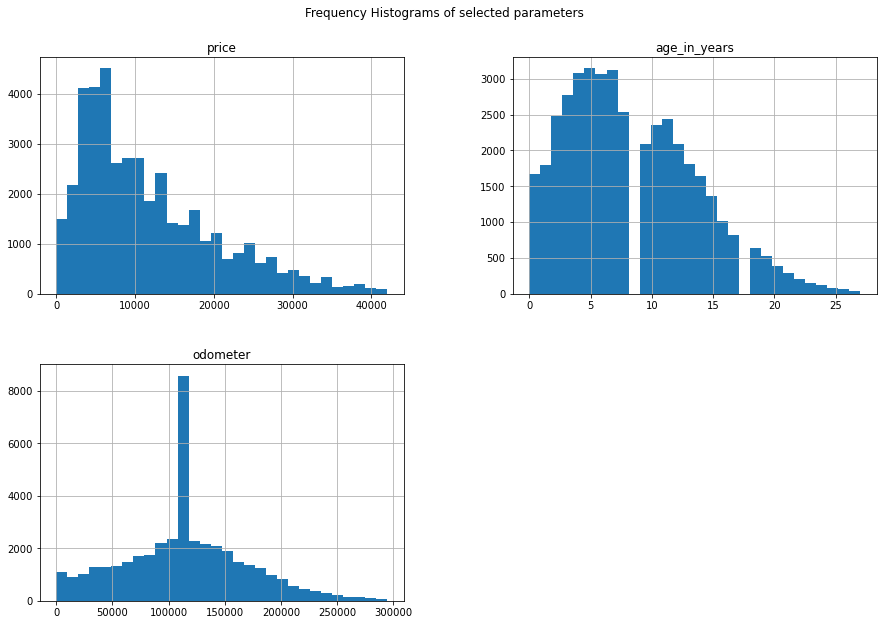

In [63]:
auto_filtered[['price', 'age_in_years', 'odometer']].hist(bins=30, figsize=(15, 10))
plt.suptitle('Frequency Histograms of selected parameters', y=0.95)
plt.show();

A Z-score is a great mathematical resource when dealing with extreme outliers like those found in the *price*, *age_in_years*, and *odometer* columns. The Z-score is used to find the distribution of data where the mean is 0 and the standard deviation is 1. We were able to re-scale and center the data in order to look for data that was too far from zero i.e. outliers using a threshold of 3 or -3. If the data point is greater than or less than our 3/-3 range, the data point will be identified as an outlier. Before the Z-score calculation, each of these columns had a huge right skew. After removing outliers, the distribution is almost normal distribution.

In [64]:
auto_filtered[['price', 'age_in_years', 'odometer']].describe()

price  age_in_years       odometer
count  41754.000000  41754.000000   41754.000000
mean   11717.179887      8.270681  114313.088375
std     8609.081838      5.374979   55262.531289
min        1.000000      0.000000       0.000000
25%     5000.000000      4.000000   80181.500000
50%     9000.000000      7.000000  113000.000000
75%    16499.000000     12.000000  146000.000000
max    42000.000000     27.000000  294500.000000

By looking at the statistics of the filtered vehicle data, we observe that the outliers in the initial dataset have been removed, for instance the maximum *price* in the filtered data is 42,000 against 375,000 in the initial dataset. Also, the 50% percentile of the filtered data is closer to the mean of the data. This means we were successful in the process of removing outliers from our data.

#### Study of days advertisements were displayed

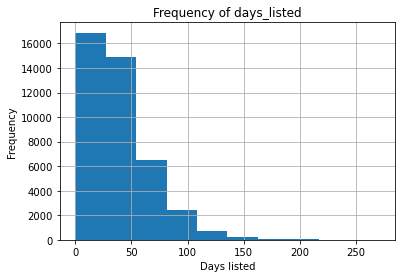

In [65]:
auto_filtered['days_listed'].hist()
plt.xlabel('Days listed')
plt.ylabel('Frequency')
plt.title("Frequency of days_listed")
plt.show();

The "Frequency of days_listed" histogram above shows the frequency distribution of days_listed in this data set. We can see that the mean lifetime of an ad is 39 days and the median is 33 days. In general, the lifetime of an ad appears to be around one month. There are ads that were listed for 0 days. This could be because the car sold the same day hence the ad was not listed for a full day. There are also ads that were up for 271 days. That is almost a year which is a long time for a car to be on sale. However, it's not impossible. The expected listing length of about a month seems to match what we'd expect in the real world.

In [66]:
auto_filtered['days_listed'].describe()

count    41754.000000
mean        39.556498
std         28.198541
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

In [67]:
days_listed_0 = auto_filtered.query('days_listed <= 1')
days_listed_0.shape

(178, 19)

In [68]:
days_listed_100 = auto_filtered.query('days_listed > 100')
days_listed_100.shape

(1580, 19)

Based on the analyses on the number a days an advertisement was on the website, the typical lifetime of an ad is around one month. By making a .query() calculation, we determined that 41 ads were listed and removed within the same day (0 days). This would probabily be due to a car being sold on the same day that the ad was placed, therefore, rendering that the ad wasn't placed for an entire day. Based on another .query() calculation, we determined that 
 1580 ads were listed for more than 100 days, and some ads staying up for 271 days. That is quite a long time for a car to be on sale. However, it is not impossible. The expected listing length of a month seems to match what we would expect in the real world. We can conclude that ads were removed quickly after 1 day, and ads were abnormally listed for 271 days.

To ensure that we do not introduce bias in the data when carrying out analysis, we would be assuming that vehicles listed after 7 days, and less than 100 days is the appropriate duration for the vehicle listing. One week is appropriate for a car to be listed and sold if the car is in good or excellent condition, and about 100 days is appropriate if the car is in fair condition. We do this because we wouldn't want to exclude too many data points by using the average of 39 days.

#### Study of the number of ads and average price for each vehicle type

In [69]:
print('Mean number of hours for listing less than a day is {:.1f} hours'.format(days_listed_0['days_listed'].mean() * 24))

Mean number of hours for listing less than a day is 18.5 hours


In [70]:
normal_listing = auto_filtered.query('7 <= days_listed <= 100').pivot_table(
    index='type', values='days_listed', aggfunc=['mean', 'count']
)
normal_listing.columns = ['mean_days_listed', 'vehicles']
print(normal_listing.sort_values(by='mean_days_listed', ascending=False).head())

           mean_days_listed  vehicles
type                                 
bus               41.650000        20
hatchback         39.322709       753
offroad           39.152318       151
wagon             38.608392      1144
pickup            38.019596      5154


In [71]:
brand_stat = auto_filtered.query('7 <= days_listed <= 100').pivot_table(
    index='type', values = 'price', aggfunc = 'mean'
)
print(brand_stat)

                    price
type                     
SUV          10745.730326
bus          16638.800000
convertible  12724.027875
coupe        13701.249537
hatchback     6736.602922
mini-van      8061.320186
offroad      14504.000000
other        10933.306818
pickup       15822.788708
sedan         7000.962678
truck        15946.766259
van          10307.121535
wagon         9031.410839


In [72]:
normal_brand_listing = normal_listing.join(brand_stat, on='type').reset_index()
print(normal_brand_listing)

           type  mean_days_listed  vehicles         price
0           SUV         37.929702      9289  10745.730326
1           bus         41.650000        20  16638.800000
2   convertible         37.874564       287  12724.027875
3         coupe         36.859790      1619  13701.249537
4     hatchback         39.322709       753   6736.602922
5      mini-van         37.480278       862   8061.320186
6       offroad         39.152318       151  14504.000000
7         other         37.835227       176  10933.306818
8        pickup         38.019596      5154  15822.788708
9         sedan         37.666160      9217   7000.962678
10        truck         37.945637      9087  15946.766259
11          van         37.831557       469  10307.121535
12        wagon         38.608392      1144   9031.410839


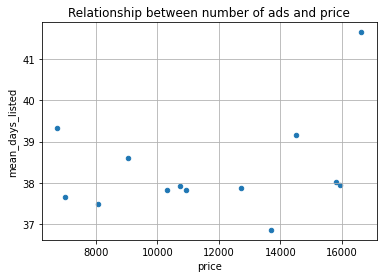

In [73]:
normal_brand_listing.plot(
    x='price', 
    y='mean_days_listed', 
    title = 'Relationship between number of ads and price', 
    kind='scatter', 
    grid=True
)
plt.show();

There appears to be no linear relationship between the number of ads and price.

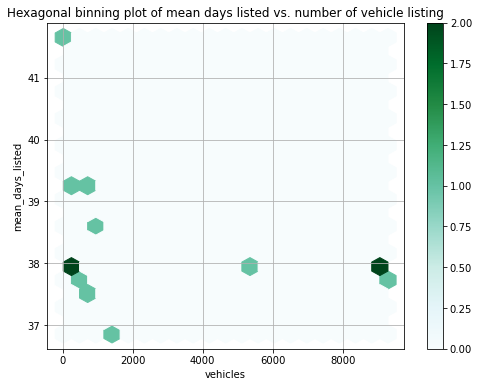

In [76]:
normal_brand_listing.plot(
    x='vehicles', 
    y='mean_days_listed', 
    title='Hexagonal binning plot of mean days listed vs. number of vehicle listing',
    kind='hexbin', 
    gridsize=20, 
    figsize=(8, 6), 
    sharex=False, 
    grid=True
)
plt.show();

The hexagonal binning plot also showed that number of ads and vehicle price do not have a linear relationship.

In [77]:
fig = px.scatter(normal_brand_listing, x='mean_days_listed', y='vehicles',
                 title='Interactive scatterplot showing vehicle type vs. mean days listed',
                 size='price', color='type', hover_name='type')
fig.update_layout(width=900, 
                  height=450
)        

We have studied the relationship between the number of ads and the average price for each type of vehicle. We observed that the ads were removed quickly after 18.5 hours. We determined that the two type with the greatest number of ads is the bus and hatchback. We also determined that the two type with the highest mean price is the bus and truck. We now need to find correlation within our data which will help us in answering the business question .i.e. to determine which factors influence the price of a vehicle.

#### Conclusion

We started by checking for correlation among numerical variables and noticed our data had some outliers. We then plotted the histogram and observed the skewness of our data. We applied Z-score approach to detect and remove outliers from our data. We then analyze our filtered data and observed that after 18.5 hours, ads were removed quickly. This is pretty fast. It could be due to error in posting the ads or error in the data collection and recording process. Our analysis shows that the SUV and the truck are the two types with the greatest number of ads.

#### Determine what factors impact price the most

In [80]:
auto_filtered['type'].value_counts()

SUV            10166
sedan          10071
truck           9881
pickup          5588
coupe           1769
wagon           1264
mini-van         954
hatchback        829
van              531
convertible      318
other            193
offroad          170
bus               20
Name: type, dtype: int64

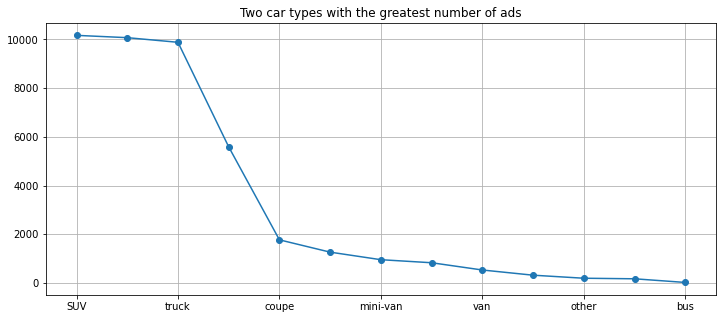

In [81]:
auto_filtered['type'].value_counts().plot(style='o-',grid=True, figsize=(12,5))
plt.title('Two car types with the greatest number of ads');

In [82]:
good_vehicles_filtered = auto_filtered.query('7 <= days_listed <= 100')

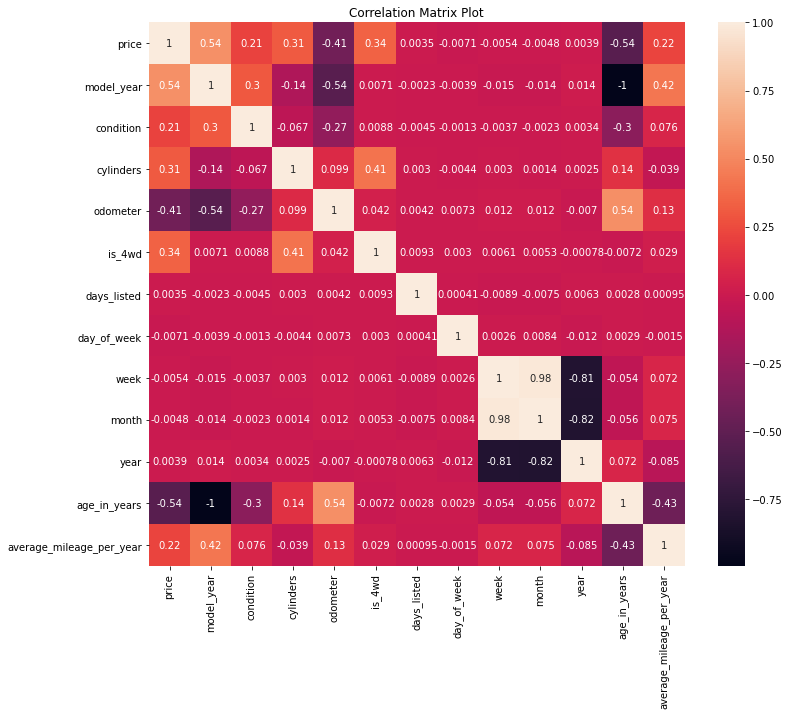

In [84]:
plt.figure(figsize=(12, 10))
corrMatrix = good_vehicles_filtered.corr()
sns.heatmap(corrMatrix, annot=True)
plt.title('Correlation Matrix Plot')
plt.show();

From the "Correlation Matrix Plot" correlation plot above, we can see that there is a weak positive correlation between *model_year* and *price* with a correlation value of 0.54. Similarly, the *age_in_years* has a weak negative correlation with *price*. We can groupby the type to see the most popular type and study whether *price* depends on age, mileage, condition, transmission type, and color.

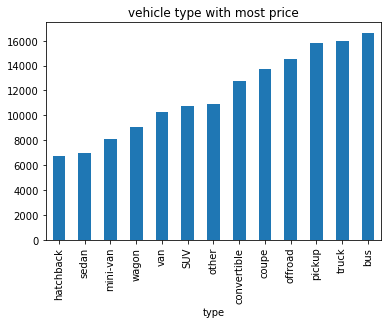

In [85]:
(good_vehicles_filtered
     .groupby('type')['price']
     .mean()
     .sort_values()
     .plot(kind='bar', title='vehicle type with most price')
)
plt.show();

In [86]:
(good_vehicles_filtered
     .groupby('type')['price']
     .describe()
     .sort_values(by='mean', ascending=False)
)

count          mean           std     min      25%      50%  \
type                                                                        
bus            20.0  16638.800000  11533.296747  4995.0  6496.50   9200.0   
truck        9087.0  15946.766259   9511.349527     1.0  8000.00  14995.0   
pickup       5154.0  15822.788708   9695.093126     1.0  7499.25  14792.0   
offroad       151.0  14504.000000   8841.440424    15.0  6775.00  12500.0   
coupe        1619.0  13701.249537   9335.487321     1.0  4995.00  12500.0   
convertible   287.0  12724.027875   7857.129203     1.0  5974.50  12980.0   
other         176.0  10933.306818   8002.034835     1.0  5837.50   8995.0   
SUV          9289.0  10745.730326   7691.969704     1.0  4999.00   8900.0   
van           469.0  10307.121535   8612.922716     1.0  4899.00   7995.0   
wagon        1144.0   9031.410839   5618.586232   188.0  4995.00   7900.0   
mini-van      862.0   8061.320186   5695.888550   500.0  3995.00   6495.0   
sedan        9217.0   7000.962678   4349.342423     1.0  3995.00   5995.0   
hatchback     753.0   6736.602922   3950.941634     1.0  4200.00   5900.0   

                 75%      max  
type                           
bus          28990.0  28990.0  
truck        22073.0  42000.0  
pickup       22999.0  42000.0  
offroad      19700.0  36200.0  
coupe        21100.0  41900.0  
convertible  17944.0  38500.0  
other        12996.0  41000.0  
SUV          14900.0  42000.0  
van          11995.0  34900.0  
wagon        12900.0  39995.0  
mini-van     10500.0  38900.0  
sedan         9000.0  40000.0  
hatchback     8400.0  27500.0

Now we are going to look at the effects on the *price* column for the top two vehicle types, SUVs and trucks.

In [103]:
filtered_data_truck = good_vehicles_filtered.query('type == "truck"')
filtered_data_truck.head()
filtered_data_SUV = good_vehicles_filtered.query('type == "SUV"')
filtered_data_SUV.head()

price  model_year                     model  condition  cylinders fuel  \
19   7500        2004       chevrolet silverado          4          8  gas   
44   6200        2006                ford f-150          3          6  gas   
47  10400        2012        chevrolet colorado          3          5  gas   
53  13000        2005                  ram 1500          2          8  gas   
54  16999        2013  chevrolet silverado 1500          2          8  gas   

    odometer transmission   type paint_color  is_4wd date_posted  days_listed  \
19    180000    automatic  truck         red       1  2019-01-05           64   
44     69698    automatic  truck      custom       0  2018-05-03           50   
47    111871    automatic  truck         red       1  2019-01-30           27   
53    146000    automatic  truck        grey       1  2019-03-14           26   
54    137230    automatic  truck       white       1  2018-05-29           24   

    day_of_week  week  month  year  age_in_years  average_mileage_per_year  
19            5     1      1  2019            15                     12000  
44            3    18      5  2018            12                      5808  
47            2     5      1  2019             7                     15981  
53            3    11      3  2019            14                     10428  
54            1    22      5  2018             5                     27446

price  model_year          model  condition  cylinders fuel  odometer  \
0    9400        2011         bmw x5          2          6  gas    145000   
6   15990        2013    honda pilot          3          6  gas    109473   
7   11500        2012    kia sorento          3          4  gas    104174   
12  12990        2009      gmc yukon          3          8  gas    132285   
15  13990        2014  jeep cherokee          3          6  gas    100669   

   transmission type paint_color  is_4wd date_posted  days_listed  \
0     automatic  SUV     unknown       1  2018-06-23           19   
6     automatic  SUV       black       1  2019-01-07           68   
7     automatic  SUV     unknown       1  2018-07-16           19   
12    automatic  SUV       black       1  2019-01-31           24   
15    automatic  SUV         red       1  2018-08-16           25   

    day_of_week  week  month  year  age_in_years  average_mileage_per_year  
0             5    25      6  2018             7                     20714  
6             0     2      1  2019             6                     18245  
7             0    29      7  2018             6                     17362  
12            3     5      1  2019            10                     13228  
15            3    33      8  2018             4                     25167

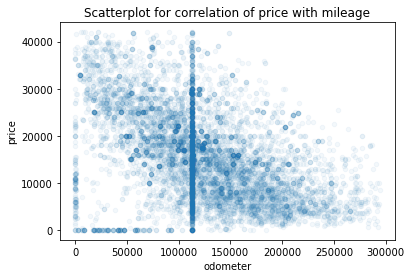

In [101]:
filtered_data_truck.plot.scatter(x='odometer', y='price', title='Trucks Scatterplot for correlation of price with mileage', alpha=0.05)
plt.show();

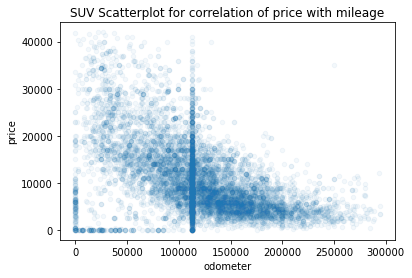

In [104]:
filtered_data_SUV.plot.scatter(x='odometer', y='price', title='SUV Scatterplot for correlation of price with mileage', alpha=0.05)
plt.show();

We plot the scatterplots to check linear correlation of the price with mileage. We can observe that price has a negative correlation with the mileage. As the mileage decreases, the price increases or the higher the price, the lower the mileage.

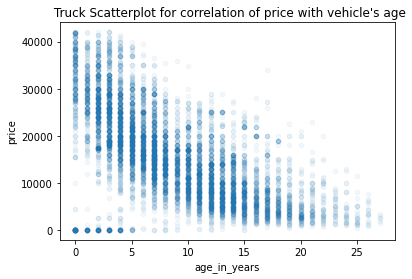

In [110]:
filtered_data_truck.plot.scatter(x='age_in_years', y='price', title=" Truck Scatterplot for correlation of price with vehicle's age", alpha=0.05)
plt.show();

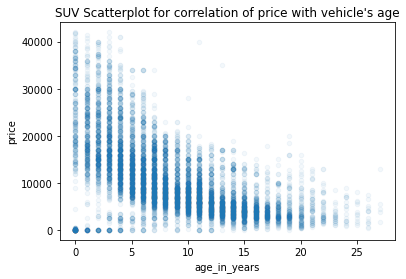

In [111]:
filtered_data_SUV.plot.scatter(x='age_in_years', y='price', title="SUV Scatterplot for correlation of price with vehicle's age", alpha=0.05)
plt.show();

We plot the scatterplots to check linear correlation of the price with vehicle's age. We can observe that price has a negative correlation with the age of the vehicle. i.e. the older the car, the lower the price. Newer cars or cars less than 5 years old command higher price which is to be expected.

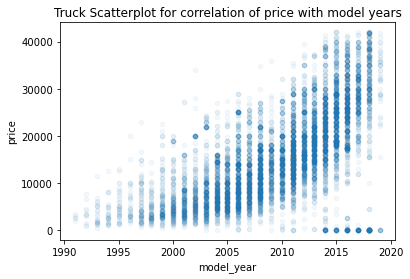

In [118]:
filtered_data_truck.plot.scatter(x='model_year', y='price', title="Truck Scatterplot for correlation of price with model years", alpha=0.05)
plt.show();

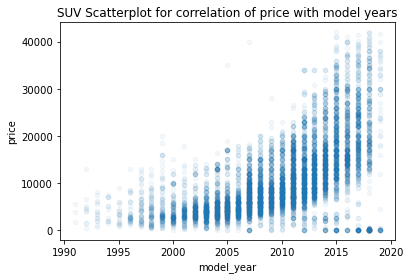

In [119]:
filtered_data_SUV.plot.scatter(x='model_year', y='price', title="SUV Scatterplot for correlation of price with model years", alpha=0.05)
plt.show();

Our correlation plots of price with model years shows that older cars command lower price. The year with the highest price range is between 2010 to 2020. This is to be expected. Newer cars should command high price.

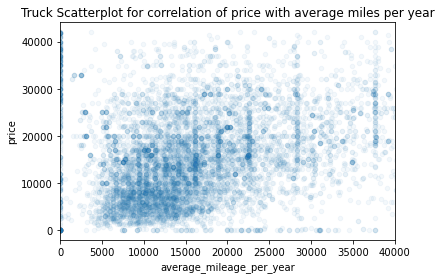

In [120]:
filtered_data_truck.plot.scatter(x='average_mileage_per_year', y='price', title="Truck Scatterplot for correlation of price with average miles per year", alpha=0.05, xlim=(0, 40000))
plt.show();

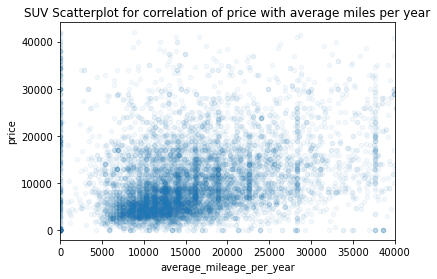

In [121]:
filtered_data_SUV.plot.scatter(x='average_mileage_per_year', y='price', title="SUV Scatterplot for correlation of price with average miles per year", alpha=0.05, xlim=(0, 40000))
plt.show();

From the scatterplots for correlation of price with average miles per year, we don't really notice a direct correlation between the variables. We can say that the variables are not so correlated based on the plot.

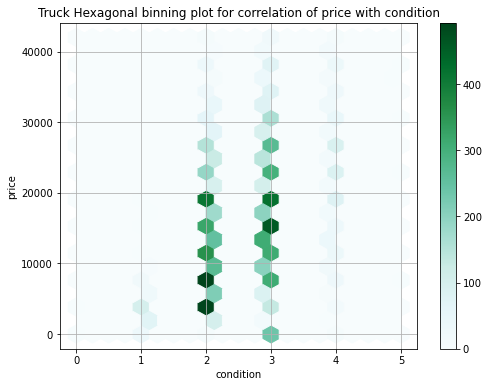

In [122]:
filtered_data_truck.plot(
    x='condition', y='price', title = 'Truck Hexagonal binning plot for correlation of price with condition', 
    kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True
)
plt.show();

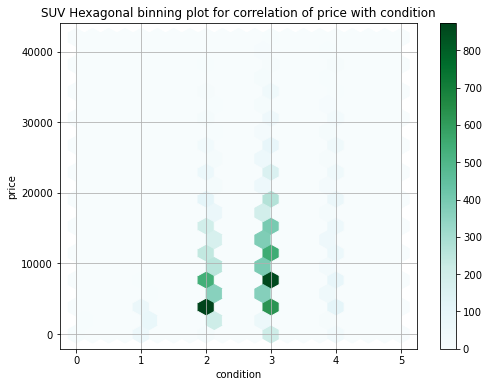

In [123]:
filtered_data_SUV.plot(
    x='condition', y='price', title = 'SUV Hexagonal binning plot for correlation of price with condition', 
    kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True
)
plt.show();

The hexagonal binning plots show that trucks and SUV's have cars that are in good and excellent condition. We observe from the data that cars with good, excellent, and like-new conditions command higher price than cars with other conditions.

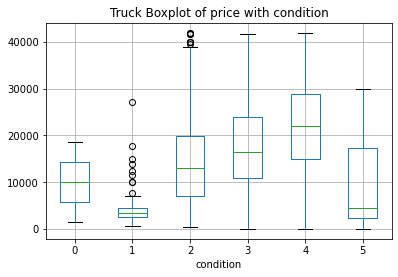

In [127]:
(filtered_data_truck
     .query('days_listed >= 50')
     .boxplot(by='condition', column='price')
)
plt.title('Truck Boxplot of price with condition')
plt.suptitle("")
plt.show();

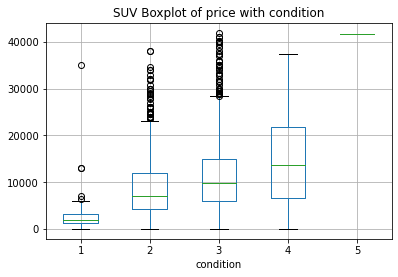

In [129]:
(filtered_data_SUV
     .query('days_listed >= 50')
     .boxplot(by='condition', column='price')
)
plt.title('SUV Boxplot of price with condition')
plt.suptitle("")
plt.show();

We queried the truck and SUV data for listing of at least 50 ads and plotted the boxplot of condition grouped by price. We observed that the condition with the most price is the like new (or 4). The boxplot shows cars with fair (or 1) having the least price. This shows that the condition has a huge influence on the price.

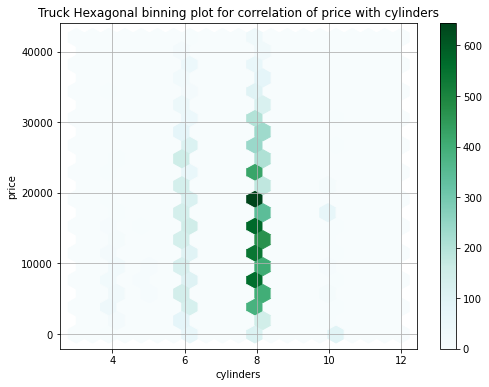

In [130]:
filtered_data_truck.plot(
    x='cylinders', y='price', title = 'Truck Hexagonal binning plot for correlation of price with cylinders', 
    kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True
)
plt.show();

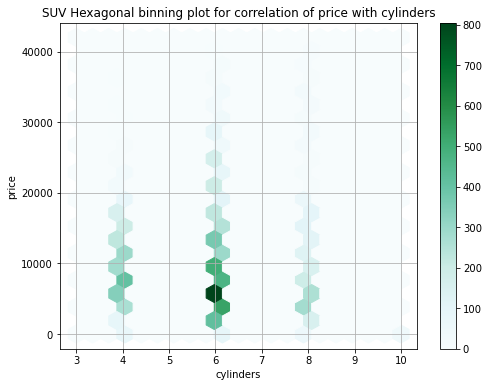

In [131]:
filtered_data_SUV.plot(
    x='cylinders', y='price', title = 'SUV Hexagonal binning plot for correlation of price with cylinders', 
    kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True
)
plt.show();

The hexagonal binning plots shows that the trucks and SUVs of our dataset contain cars that have mostly 6 and 8 cylinders. We observe from the data that cars with 6- and 8-cylinders command higher price than cars with other cylinders types. Cars with more cylinders have a higher average price. This makes sense because number of cylinders is related to the power of the engine. More powerful cars are generally more expensive.

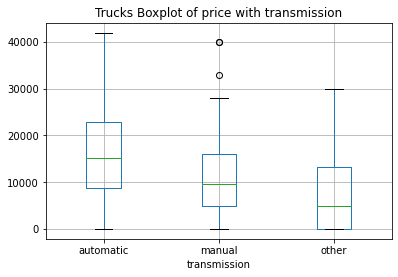

In [133]:
(filtered_data_truck
     .query('days_listed >= 50')
     .boxplot(by='transmission', column='price')
)
plt.title('Trucks Boxplot of price with transmission')
plt.suptitle("")
plt.show();

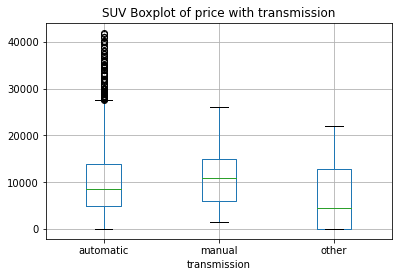

In [134]:
(filtered_data_SUV
     .query('days_listed >= 50')
     .boxplot(by='transmission', column='price')
)
plt.title('SUV Boxplot of price with transmission')
plt.suptitle("")
plt.show();

Looking at the boxplots of relationship between transmission and price, we observe that transmission has an influence on the price. Car with automatic transmission cost about 32% more than cars with manual transmission. This is to be expected because most cars with automatic transmission are newer cars. We can conclude that cars with automatic transmission tends to cost more on the avarage than cars with manual transmission. Thus, the type of transmission has a big impact on the price.

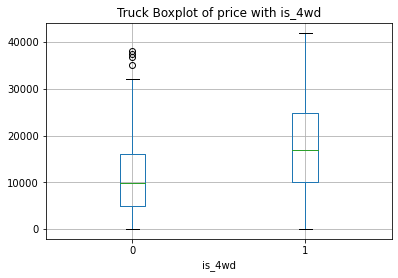

In [135]:
(filtered_data_truck
     .query('days_listed >= 50')
     .boxplot(by='is_4wd', column='price')
)
plt.title('Truck Boxplot of price with is_4wd')
plt.suptitle("")
plt.show();

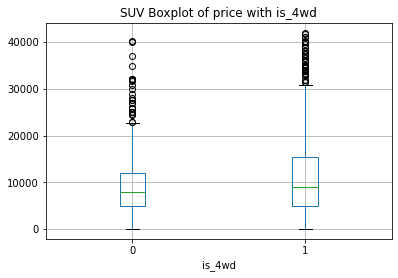

In [136]:
(filtered_data_SUV
     .query('days_listed >= 50')
     .boxplot(by='is_4wd', column='price')
)
plt.title('SUV Boxplot of price with is_4wd')
plt.suptitle("")
plt.show();

The box plots of the relationship between price and whether a car is 4wd or not shows that cars that are 4wd cost more than cars that are not. This is to be expected because cars with 4wd will likely be a 6- or 8-cylinder vehicle, and hence will cost more. Also, people are more likely to pay more for a 4wd because of that extra feature in the drivetrain.

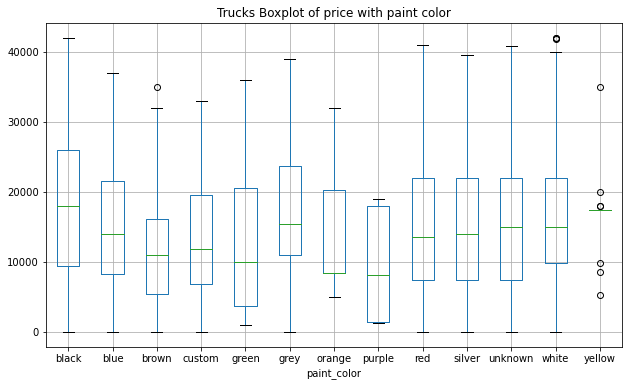

In [137]:
(filtered_data_truck
     .query('days_listed >= 50')
     .boxplot(by='paint_color', column='price', figsize=(10,6))
)
plt.title('Trucks Boxplot of price with paint color')
plt.suptitle("")
plt.show();

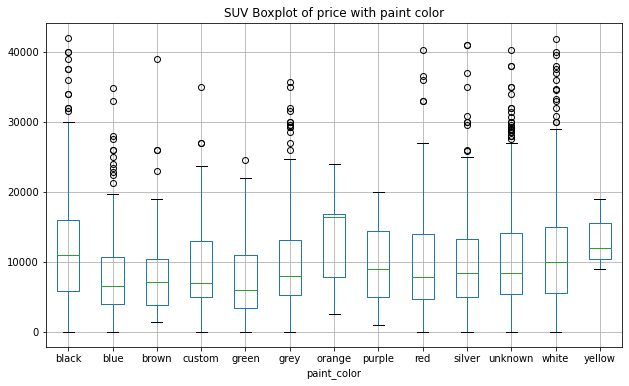

In [138]:
(filtered_data_SUV
     .query('days_listed >= 50')
     .boxplot(by='paint_color', column='price', figsize=(10,6))
)
plt.title('SUV Boxplot of price with paint color')
plt.suptitle("")
plt.show();

From the boxplots of price with paint color, there is no clear difference in price based on the color. The distribution of price between different color categories have a significant overlap, and so paint color would not be a good predictor of price.

#### Conclusion
We generated a pie chart using the relative size of the vehicle type in terms of price. We then plotted scatter plot to illustrate the correlation of certain features with price. The plot of correlation with mileage shows a negative correlation .i.e. the higher the mileage, the lower the price. Typically, fewer miles translate to higher resale value. Similar observation was noticed in the correlation plot of age with price. We observed that as the age of a car increases, the price decreases. In contrast, the plot of price with model years shows that as the model year of the car increases, the price increases too. The condition of the car is equally an important feature. We observe from the data that cars with good, excellent, and like-new conditions command higher price than cars with other conditions. We also noticed that cars with 4wd command higher price than cars without 4wd. Looking at the scatterplot for the correlation of transmission type with price, we can see that cars with automatic transmission command higher price than manual transmission type. This shows that type of transmission is an important factor that affects car price. The distribution of price between different color categories have a significant overlap, and so paint_color would not be a good predictor of price.

### 5. Overall conclusion
From the data preprocessing stage, we identified missing values in our data and noted that the values are Missing at random (MAR). We used a couple of methods for handling the missing values on a case-by-case basis. We dropped missing rows in model_year and cylinders column, replaced missing value in the odometer column using the median, and created new category for missing values in the paint_color column. We then identified different data types and proceeded to change datatypes. We made calculations, created new features and used those features to determine the vehicle's age in years age_in_years, and the average miles per year, avg_miles_year. We plotted the distribution of the data and observed some anomalies in the data. Our data was mostly skewed thus we detected and removed outliers from the data. We used the filtered data to plot new histogram, and carry out analysis. From our analysis, we found that the typical lifetime of an ad is around one month. We also observe that ads were removed quickly after 1 day, and ads were abnormally listed for 271 days.

We observed that the bus and hatchback are the two types with the greatest number of ads. We plotted visualization and analyzed the data to have a better understanding of our data and the important factors that influence the price of a vehicle. Our analysis shows that the following variables are important predictor of vehicle price:

- *mileage*
- *age_in_years*
- *model_year*
- *condition*
- *cylinders*
- *transmission type*

Knowing this is important because we are able to answer the business question about what factors influence vehicle price for listings at Crankshaft List.